In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tkinter import E
df = df.reset_index(drop=True) # Remove the index from the file

# import Data miners 2022 (answers).csv from the same directory as this file and create a dataframe called df
df = pd.read_csv('Data miners 2022 (answers).csv')


#change Your height (in International inches)\nAlready, an awkward data storage format. It's good to be fluent in multiple systems! to height
df = df.rename(columns={'Your height (in International inches)\nAlready, an awkward data storage format. It\'s good to be fluent in multiple systems!':'height'})
#change Your mean shoe size (In European Continental system)	to shoe_size
df = df.rename(columns={'Your mean shoe size (In European Continental system)':'shoe_size'})

# Assign all points to class 1
df['class'] = 1 

#remove all columns but shoe_size, height, and class
df = df[['shoe_size', 'height', 'class']]

#remove observations that are 3 standard deviations from the mean
df = df[(np.abs(df.height-df.height.mean()) <= (3*df.height.std())) & (np.abs(df.shoe_size-df.shoe_size.mean()) <= (3*df.shoe_size.std()))]

#normalize the data
df['shoe_size'] = (df['shoe_size'] - df['shoe_size'].mean()) / df['shoe_size'].std()
df['height'] = (df['height'] - df['height'].mean()) / df['height'].std()




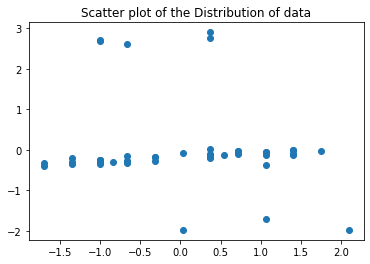

,shoe_size,height,class
0,2.089348,-1.968407,1
1,-0.660503,2.614739,1
2,0.370691,-0.206974,1
3,-1.004235,-0.249727,1
4,-0.316772,-0.271389,1
5,0.370691,0.021043,1
6,1.058154,-0.124318,1
8,0.370691,-0.127168,1
9,-0.316772,-0.178472,1
10,0.026959,-1.974108,1


In [64]:
plt.title('Scatter plot of the Distribution of data')
plt.scatter(df['shoe_size'],df['height']) # Visualizing the distribution
plt.show()

display(df)

In [65]:
def initializeMeans(df):

    """
    Intialize the means by randomly taking two points from the dataframe. Hint: check the function 'random.randint'
    return two pandas dataframes (or pandas series) with mean1 and mean2
    """

    # Randomly initialize the means
    mean1 = df.iloc[random.randint(0,len(df)-1)]
    mean2 = df.iloc[random.randint(0,len(df)-1)]

    return mean1, mean2

In [66]:
def euclideanDist(df,pointIDX,mean1,mean2):

    # Calculate the euclidean distance between the point and the two means
    dist1 = np.sqrt((df.iloc[pointIDX]['shoe_size'] - mean1['shoe_size'])**2 + (df.iloc[pointIDX]['height'] - mean1['height'])**2)
    dist2 = np.sqrt((df.iloc[pointIDX]['shoe_size'] - mean2['shoe_size'])**2 + (df.iloc[pointIDX]['height'] - mean2['height'])**2)
    
    # Assign the point to the mean with the smallest distance
    if dist1 < dist2:
        df['class'][pointIDX] = 1
    else:
        df['class'][pointIDX] = 2
    
    return df


m1, m2 = initializeMeans(df)
b = euclideanDist(df, 5, m1,m2)

/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


In [67]:
def updateMean(df):
    """
    df is the dataframe of points containing the assigned classes
    return updated mean1 and mean2 based on the value in column 'class'. mean1 and mean2 should still be pandas dataframes (or pandas series)
    """
    mean1 = df[df['class'] == 1].mean()
    mean2 = df[df['class'] == 2].mean()
    
    return mean1, mean2

/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clas

Iteration 0/0
Iteration 1/1


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 2/2


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 3/3


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 4/4


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 5/5


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 6/6


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 7/7


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 8/8


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 9/9


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 10/10


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 11/11


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 12/12


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 13/13


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 14/14


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 15/15


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 16/16


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 17/17


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 18/18


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 19/19


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8884/340918323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


<Figure size 432x288 with 0 Axes>

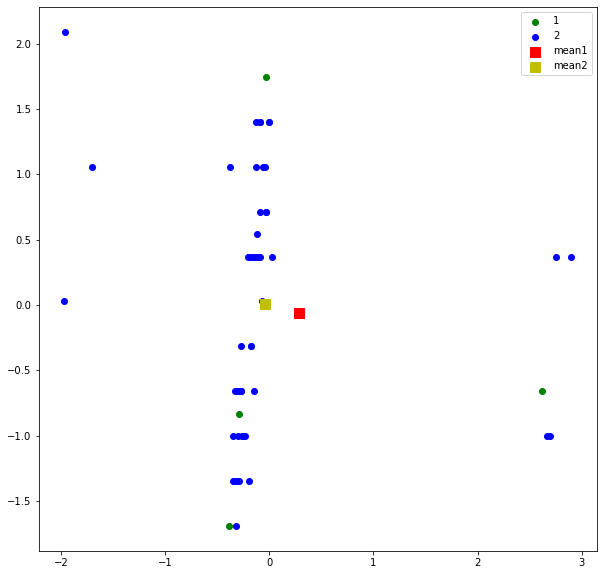

In [68]:
def Kmeans(df,iterations):
    """
    When you have implemented the three functions this function should work and run the Kmeans algorithm!
    """

    mean1 , mean2 = initializeMeans(df)

    for iteration in range(iterations): # Change this when implementing how many times it should recalculate the mean

        print("Iteration {}/{}".format(iteration,iteration))
        
        for i in range(len(df)):
            df = euclideanDist(df,i,mean1,mean2)
            
        mean1,mean2 = updateMean(df)

    return df, mean1, mean2

df, mean1, mean2 = Kmeans(df,20)


plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(df.loc[df['class'] == 1]['height'],df.loc[df['class'] == 1]['shoe_size'],color='g',label='1')  #
plt.scatter(df.loc[df['class'] == 2]['height'],df.loc[df['class'] == 2]['shoe_size'],color='b',label='2')  #

plt.scatter(mean1['height'],mean1['shoe_size'],s=120,label='mean1',marker='s',color='r')                    # Visualizing the final class distribution
plt.scatter(mean2['height'],mean2['shoe_size'],s=120,label='mean2',marker='s',color='y')  

plt.legend()                                                                                                #
plt.show()   
